In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import (RandomOverSampler)

In [2]:
os.getcwd()

'/Users/arvindpawar'

In [3]:
os.chdir(r'/Users/arvindpawar/Desktop/XN Updated')

In [4]:
indicatorData=pd.read_csv('indicator_pairs_data updated.csv')

In [5]:
indicatorData['alert_type'].value_counts()

Atomic          92589
Daily_Heat      16379
Weekly_Heat     11681
Monthly_Heat    11428
Name: alert_type, dtype: int64

In [6]:
indicatorData.loc[indicatorData['alert_type'] == 'Daily_Heat'].reset_index()

,index,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,alert_category,alert_type,indicator_pairs
0,7776,2/9/2018,976584706,1/24/2018,174,Senior_Analyst_1,19616361638,1.74,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
1,7793,2/9/2018,1764316194,1/24/2018,171,Senior_Analyst_1,19616361638,1.71,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
2,8092,2/9/2018,342985575,1/26/2018,321,Senior_Analyst_1,19616361638,3.21,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
3,8099,2/9/2018,1279998910,1/26/2018,312,Senior_Analyst_1,19616361638,3.12,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
4,8104,2/9/2018,1235439264,1/26/2018,300,Senior_Analyst_1,19616361638,3.00,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16374,132066,9/24/2019,2039231178,9/24/2019,193,Analyst_6,19620542356,1.93,100,TP/DE,None,Heat,Daily_Heat,App_3_Heat_Email_ZIP/Threshold_Heat_Email_IND
16375,132069,9/24/2019,1159457803,9/24/2019,177,Analyst_7,11864624910,1.77,100,TP/DE,None,Heat,Daily_Heat,App_7_Heat_USB_NON_MIL/Threshold_Heat_BA_IND/T...
16376,132073,9/24/2019,1076301311,9/24/2019,316,Analyst_7,665484379,3.16,100,TP/DE,None,Heat,Daily_Heat,App_15_Heat_Badge_MS/App_9_Heat_Email_IND/Thre...
16377,132076,9/24/2019,1118121933,9/24/2019,216,Analyst_6,3669677450,2.16,100,TP/DE,None,Heat,Daily_Heat,App_9_Heat_Email_IND/Threshold_Heat_Email_IND


In [7]:
indicatorData=indicatorData.loc[indicatorData['alert_type'] == 'Daily_Heat'].reset_index()

In [8]:
indicatorData.shape

(16379, 14)

In [9]:
indicatorData['classification'].value_counts()

TP/DE      12224
FP          2566
TP/LOW      1114
TP/HIGH      475
Name: classification, dtype: int64

In [10]:
employeeData=pd.read_csv('obfuscated_demo_data2.csv')

In [11]:
employeeData.head()

,employee_id,person_type,person_status,ge_hire_date,city,state_name,country_name,function_group,job_function,career_band,industry_focus_name
0,2163707601,EMPLOYEE,A,9/1/1997 0:00,Reau,No_Data,France,Production,JOB_FUNCTION_7,CAREER_BAND_10,BUSINESS_SEGMENT_4
1,9225331209,EMPLOYEE,A,8/22/2006 0:00,Dubai,Dubai,United Arab Emirates,Commercial,JOB_FUNCTION_22,CAREER_BAND_9,BUSINESS_SEGMENT_4
2,9777696464,EMPLOYEE,I,3/1/2007 0:00,Dubai,Dubai,United Arab Emirates,Production,JOB_FUNCTION_24,CAREER_BAND_4,BUSINESS_SEGMENT_4
3,8893235549,EMPLOYEE,A,9/1/2003 0:00,Dzierzoniow,Lower Silesian,Poland,Enabling,JOB_FUNCTION_10,CAREER_BAND_4,BUSINESS_SEGMENT_4
4,1310142434,EMPLOYEE,I,9/4/2000 0:00,Veresegyhaz,Pest,Hungary,Production,JOB_FUNCTION_7,CAREER_BAND_10,BUSINESS_SEGMENT_4


In [12]:
employeeData['person_status'].unique()

array(['A', 'I'], dtype=object)

In [13]:
employeeData=employeeData.drop_duplicates(subset ="employee_id")

In [14]:
employeeData.shape

(3157, 11)

In [15]:
employeeData['Year']=pd.DatetimeIndex(employeeData['ge_hire_date']).year

In [16]:
employeeData.isnull().sum()

employee_id              0
person_type              0
person_status            0
ge_hire_date           478
city                   142
state_name             174
country_name           174
function_group         174
job_function             0
career_band              0
industry_focus_name      0
Year                   478
dtype: int64

In [17]:
employeeData['tenure']=(2020-employeeData['Year'])

In [18]:
empdummydata=pd.get_dummies(employeeData, columns=['career_band', 'job_function'])

In [19]:
empdummydata=empdummydata.iloc[:, np.r_[0,10:47]]

In [20]:
empdummydata.head()

,employee_id,tenure,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,...,job_function_JOB_FUNCTION_24,job_function_JOB_FUNCTION_25,job_function_JOB_FUNCTION_26,job_function_JOB_FUNCTION_3,job_function_JOB_FUNCTION_4,job_function_JOB_FUNCTION_5,job_function_JOB_FUNCTION_6,job_function_JOB_FUNCTION_7,job_function_JOB_FUNCTION_8,job_function_JOB_FUNCTION_9
0,2163707601,23.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9225331209,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9777696464,13.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8893235549,17.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1310142434,20.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
testset=empdummydata[empdummydata['tenure'].isnull()]

In [22]:
trainset=empdummydata[~empdummydata['tenure'].isnull()]

In [23]:
trainset.head()

,employee_id,tenure,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,...,job_function_JOB_FUNCTION_24,job_function_JOB_FUNCTION_25,job_function_JOB_FUNCTION_26,job_function_JOB_FUNCTION_3,job_function_JOB_FUNCTION_4,job_function_JOB_FUNCTION_5,job_function_JOB_FUNCTION_6,job_function_JOB_FUNCTION_7,job_function_JOB_FUNCTION_8,job_function_JOB_FUNCTION_9
0,2163707601,23.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9225331209,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9777696464,13.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8893235549,17.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1310142434,20.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
testset.head()

,employee_id,tenure,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,...,job_function_JOB_FUNCTION_24,job_function_JOB_FUNCTION_25,job_function_JOB_FUNCTION_26,job_function_JOB_FUNCTION_3,job_function_JOB_FUNCTION_4,job_function_JOB_FUNCTION_5,job_function_JOB_FUNCTION_6,job_function_JOB_FUNCTION_7,job_function_JOB_FUNCTION_8,job_function_JOB_FUNCTION_9
5,8714002494,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,187153423,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,4680091097,NaN,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14,9678700500,NaN,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
91,19639355437,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
X=trainset.iloc[:, 2:]

In [26]:
# X=trainset.iloc[:, 2:]
Y=trainset.iloc[:, 1]
# regressor=DecisionTreeRegressor(random_state=0)
# regressor.fit(X,Y)
# testset_pred=testset.iloc[:,2:]
# tenure_predict=regressor.predict(testset_pred)
# testset=testset.reset_index()
# testset=testset.drop(['index'], axis=1)
# testset['tenure_pred']=pd.DataFrame({"tenure_pred":tenure_predict})
# testset=testset.drop(['tenure'], axis=1)
# employeeData.loc[employeeData.employee_id.isin(testset.employee_id),'tenure'] = employeeData.employee_id.map(testset.set_index('employee_id').tenure_pred)

In [27]:
regressor=DecisionTreeRegressor(random_state=0)

In [28]:
regressor.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [29]:
testset_pred=testset.iloc[:,2:]

In [30]:
tenure_predict=regressor.predict(testset_pred)

In [31]:
testset=testset.reset_index()

In [32]:
testset=testset.drop(['index'], axis=1)

In [33]:
testset['tenure_pred']=pd.DataFrame({"tenure_pred":tenure_predict})

In [34]:
testset=testset.drop(['tenure'], axis=1)

In [35]:
employeeData.loc[employeeData.employee_id.isin(testset.employee_id),'tenure'] = employeeData.employee_id.map(testset.set_index('employee_id').tenure_pred)

In [36]:
employeeData.isnull().sum()

employee_id              0
person_type              0
person_status            0
ge_hire_date           478
city                   142
state_name             174
country_name           174
function_group         174
job_function             0
career_band              0
industry_focus_name      0
Year                   478
tenure                   0
dtype: int64

In [37]:
newdata = indicatorData.merge(employeeData,
                             left_on = 'employee_id',
                             right_on = 'employee_id',
                             how = 'left')

In [38]:
newdata.isnull().sum()

index                       0
alert_escalation_date       0
alert_id_fk                 0
insert_date                 0
score                       0
owner_name                 79
employee_id                 0
risk_factor                 0
avg_score                   0
classification              0
hru                         0
alert_category              0
alert_type                  0
indicator_pairs             0
person_type                 0
person_status               0
ge_hire_date             4409
city                     1272
state_name               1499
country_name             1499
function_group           1499
job_function                0
career_band                 0
industry_focus_name         0
Year                     4409
tenure                      0
dtype: int64

In [39]:
newdata['classification'].value_counts()

TP/DE      12224
FP          2566
TP/LOW      1114
TP/HIGH      475
Name: classification, dtype: int64

In [40]:
newdata["owner_name"].fillna("None", inplace = True) 

In [41]:
newdata["country_name"].fillna("None", inplace = True) 

In [42]:
newdata.isnull().sum()

index                       0
alert_escalation_date       0
alert_id_fk                 0
insert_date                 0
score                       0
owner_name                  0
employee_id                 0
risk_factor                 0
avg_score                   0
classification              0
hru                         0
alert_category              0
alert_type                  0
indicator_pairs             0
person_type                 0
person_status               0
ge_hire_date             4409
city                     1272
state_name               1499
country_name                0
function_group           1499
job_function                0
career_band                 0
industry_focus_name         0
Year                     4409
tenure                      0
dtype: int64

In [43]:
newdata.shape

(16379, 26)

In [44]:
newdata['classification'].value_counts()

TP/DE      12224
FP          2566
TP/LOW      1114
TP/HIGH      475
Name: classification, dtype: int64

In [45]:
from pandas import Series

In [46]:
s=newdata['indicator_pairs'].str.split('/').apply(Series, 1).stack()

In [47]:
s.index=s.index.droplevel(-1)

In [48]:
s.name='indicators'

In [49]:
newdata_fin_s=newdata.join(s)

In [50]:
newdata_fin_s.shape

(41189, 27)

In [51]:
d=newdata_fin_s.duplicated(subset=None, keep='last')

In [52]:
d.value_counts()

False    37519
True      3670
dtype: int64

In [53]:
newdata_fin_s.drop_duplicates(keep='last', inplace=True)

In [54]:
newdata_fin_s.to_csv(r'/Users/arvindpawar/Desktop/XN Updated/new_fin_s_nipa_updated.csv')

In [55]:
newdata_fin_s.shape

(37519, 27)

In [56]:
newdata_fin_s['classification'].value_counts()

TP/DE      29077
FP          3790
TP/LOW      3280
TP/HIGH     1372
Name: classification, dtype: int64

In [57]:
newdata1 = newdata_fin_s.drop(['alert_escalation_date','insert_date','alert_category','alert_type'
                               ,'person_status','ge_hire_date','city','state_name',
                         'function_group', 'alert_id_fk', 'avg_score', 'Year', 
                               'person_type', 'country_name', 'industry_focus_name'
                               ], axis=1)

In [58]:
newdata_fin_dummy=pd.get_dummies(newdata1, columns=['owner_name','classification','hru','job_function','indicators',
                                                       'career_band'
                                                    ])

In [59]:
newdata_fin_dummy_backup=newdata_fin_dummy.copy()

In [60]:
newdata_final_avi = newdata_fin_dummy.drop(['employee_id', 'indicator_pairs'], axis=1)

In [61]:
newdata_final_avi=newdata_final_avi.drop(['index'], axis=1)

In [62]:
newdata_final_avi.head()

,score,risk_factor,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_None,...,indicators_Top_Users_Heat_USB_IND,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
from sklearn.cluster import KMeans

In [64]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(newdata_final_avi)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

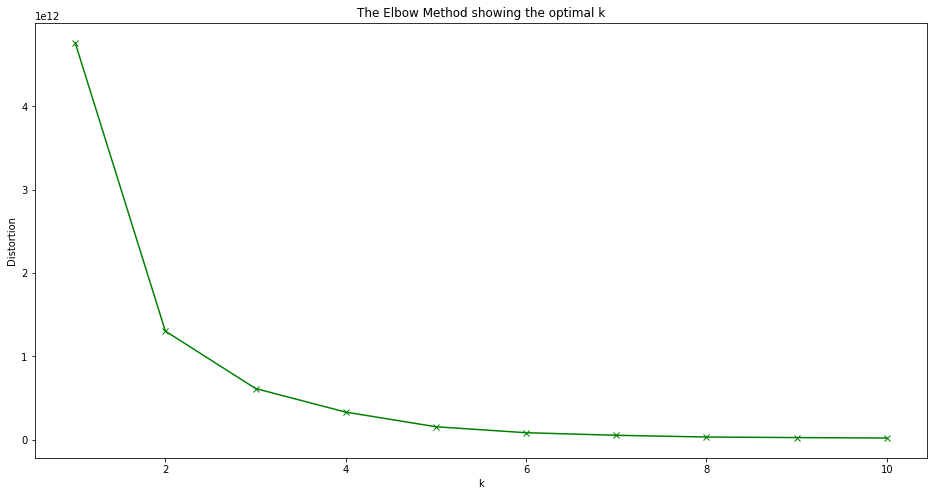

In [65]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', color='green')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [66]:
# from sklearn.metrics import silhouette_score
# range_n_clusters = list (range(3,10))
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters)
#     preds = clusterer.fit_predict(newdata_final_avi)
#     centers = clusterer.cluster_centers_

#     score = silhouette_score(newdata_final_avi, preds)
#     print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [67]:
kmeans = KMeans(n_clusters=6, random_state=0)

In [68]:
clusters = kmeans.fit_predict(newdata_final_avi)

In [69]:
print(clusters)

[0 0 0 ... 0 0 0]


In [70]:
newdata_fin_dummy=newdata_fin_dummy.drop(['index', 'employee_id'], axis=1)

In [71]:
newdata_fin_dummy

,score,risk_factor,indicator_pairs,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,...,indicators_Top_Users_Heat_USB_IND,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,1.74,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,1.71,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,3.21,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,3.12,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,3.00,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,2.16,App_9_Heat_Email_IND/Threshold_Heat_Email_IND,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16377,216,2.16,App_9_Heat_Email_IND/Threshold_Heat_Email_IND,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,App_3_Heat_Email_ZIP/App_9_Heat_Email_IND/Thre...,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,App_3_Heat_Email_ZIP/App_9_Heat_Email_IND/Thre...,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
newdata_fin_dummy= newdata_fin_dummy.reset_index()
df= pd.DataFrame(clusters)
df.columns = ['cluster_pred']
df1_avi= pd.concat([newdata_fin_dummy, df], axis = 1).reset_index()

In [73]:
# df1_avi.head()

In [74]:
# df1_avi.iloc[:, 7:]

In [75]:
gb = df1_avi.groupby(['cluster_pred']).sum()

In [76]:
gb[['classification_TP/HIGH', 'classification_TP/LOW']]

,classification_TP/HIGH,classification_TP/LOW
cluster_pred,,
0,1221.0,2950.0
1,0.0,0.0
2,0.0,30.0
3,8.0,39.0
4,0.0,0.0
5,143.0,261.0


In [82]:
gb.to_csv(r'/Users/arvindpawar/Desktop/XN Updated/updated_Daily_avi_6.csv')

In [83]:
##TP/HIGH is 1 and rest are 0 - predictive analytics

In [77]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')
newdata_rf_dummy=pd.get_dummies(newdata1, columns=['owner_name','hru','indicators',
                                                    'job_function','career_band'
                                                       ])

newdata_rf_dummy=newdata_rf_dummy.drop(['indicator_pairs'], axis=1)
newdata_rf_dummy['classification'].replace({"FP":"0", "TP/DE":"1", "TP/LOW":"2", "TP/HIGH":"3"}, inplace=True)
newdata_rf_dummy=newdata_rf_dummy.drop(['index'], axis=1)

#Creating the dependent variable class
factor = pd.factorize(newdata_rf_dummy['classification'])
newdata_rf_dummy.classification = factor[0]
definitions = factor[1]
print(newdata_rf_dummy.classification.head())
print(definitions)

Libraries Imported
0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Index(['1', '2', '3', '0'], dtype='object')


/Users/arvindpawar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [78]:
#newdata_rf_dummy=newdata_rf_dummy.drop(['index'], axis=1)

In [79]:
tpHighDf=newdata_rf_dummy.copy()

In [80]:
tpHighDf['classification'].unique()

array([0, 1, 2, 3])

In [81]:
tpHighDf['classification'] = (tpHighDf['classification'] == 3).astype(int)

In [82]:
tpHighDf['classification'].value_counts()

0    33729
1     3790
Name: classification, dtype: int64

In [83]:
tpHighDf.shape

(37519, 144)

In [84]:
#Decision Tree TP/HIGH = 1 and rest are 0

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
from sklearn import metrics

In [88]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,19616361638,1.74,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,19616361638,1.71,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,19616361638,3.21,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,19616361638,3.12,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,19616361638,3.00,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [89]:
tpHighDf.iloc[:, np.r_[0, 2, 4:144]]

,score,risk_factor,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_None,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,2.16,4.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16377,216,2.16,4.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,4.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,4.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
X=tpHighDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighDf.iloc[:, 3]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.28, random_state=1)

In [92]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [93]:
clf=DecisionTreeClassifier()

In [94]:
clf=clf.fit(X_rs, y_rs)

In [95]:
y_pred=clf.predict(X_test)

In [96]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9772510946126023


In [97]:
print("Decision Tree for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree for High Risk
Predicted Observation     0    1
Actual Observation              
0                      9324  118
1                       121  943
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9442
           1       0.89      0.89      0.89      1064

    accuracy                           0.98     10506
   macro avg       0.94      0.94      0.94     10506
weighted avg       0.98      0.98      0.98     10506


Accuracy: 0.9772510946126023


In [98]:
confusion_matrix(y_test, y_pred)

array([[9324,  118],
       [ 121,  943]])

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9442
           1       0.89      0.89      0.89      1064

    accuracy                           0.98     10506
   macro avg       0.94      0.94      0.94     10506
weighted avg       0.98      0.98      0.98     10506



In [100]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [101]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,19616361638,1.74,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,19616361638,1.71,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,19616361638,3.21,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,19616361638,3.12,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,19616361638,3.00,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
#Creating the dependent variable class (factorization)
factor = pd.factorize(tpHighDf['classification'])
tpHighDf.classification = factor[0]
definitions = factor[1]
print(tpHighDf.classification.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [103]:
X=tpHighDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighDf.iloc[:, 3]

In [104]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.28, random_state = 21)

In [105]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [107]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_rs, y_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [108]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [109]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(4),definitions))


In [111]:
y_test = np.vectorize(reversefactor.get)(y_test)


In [112]:
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print("Random Forest for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest for High Risk
Predicted Observation     0    1
Actual Observation              
0                      9291  141
1                        90  984
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9432
           1       0.87      0.92      0.89      1074

    accuracy                           0.98     10506
   macro avg       0.93      0.95      0.94     10506
weighted avg       0.98      0.98      0.98     10506


Accuracy: 0.9780125642490006


In [113]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9780125642490006


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9432
           1       0.87      0.92      0.89      1074

    accuracy                           0.98     10506
   macro avg       0.93      0.95      0.94     10506
weighted avg       0.98      0.98      0.98     10506



In [115]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

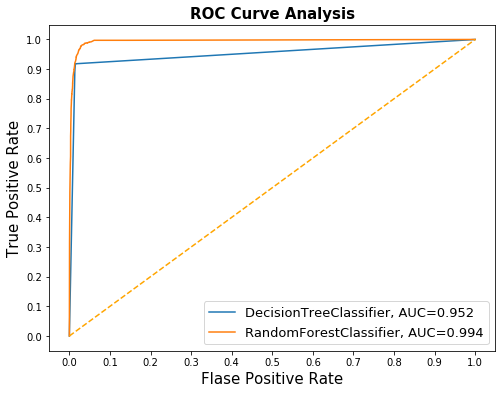

In [116]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [117]:
#TP/HIGH and TP/LOW 1 and rest 0 #DT

In [118]:
tpHighNewDf=newdata_rf_dummy.copy()

In [119]:
tpHighNewDf['classification'].unique()

array([0, 1, 2, 3])

In [120]:
tpHighNewDf['classification'].replace({0:0, 1:0, 2:1, 3:1}, inplace=True)

In [121]:
tpHighNewDf['classification'].value_counts()

0    32357
1     5162
Name: classification, dtype: int64

In [122]:
X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighNewDf.iloc[:, 3]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.28, random_state=1)

In [124]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [125]:
clf=DecisionTreeClassifier()

In [126]:
clf=clf.fit(X_rs, y_rs)

In [127]:
y_pred=clf.predict(X_test)

In [128]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.933466590519703


In [129]:
print("Decision Tree for Notable Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree for Notable Risk
Predicted Observation     0     1
Actual Observation               
0                      8630   414
1                       285  1177
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9044
           1       0.74      0.81      0.77      1462

    accuracy                           0.93     10506
   macro avg       0.85      0.88      0.87     10506
weighted avg       0.94      0.93      0.93     10506


Accuracy: 0.933466590519703


In [130]:
#RB 
#Creating the dependent variable class
factor = pd.factorize(tpHighNewDf['classification'])
tpHighNewDf.classification = factor[0]
definitions = factor[1]
print(tpHighNewDf.classification.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [131]:
X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighNewDf.iloc[:, 3]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.28, random_state=21)

In [133]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [135]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_rs, y_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [136]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [137]:
print("Random Forest for Notable Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest for Notable Risk
Predicted Observation     0     1
Actual Observation               
0                      8565   477
1                       273  1191
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9042
           1       0.71      0.81      0.76      1464

    accuracy                           0.93     10506
   macro avg       0.84      0.88      0.86     10506
weighted avg       0.93      0.93      0.93     10506


Accuracy: 0.9286122215876642


In [138]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9286122215876642


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9042
           1       0.71      0.81      0.76      1464

    accuracy                           0.93     10506
   macro avg       0.84      0.88      0.86     10506
weighted avg       0.93      0.93      0.93     10506



In [140]:
y_test.shape

(10506,)

In [141]:
y_pred.shape

(10506,)

In [212]:
#TP/HIGH and TP/LOW are 0 and rest are set to 1

In [142]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

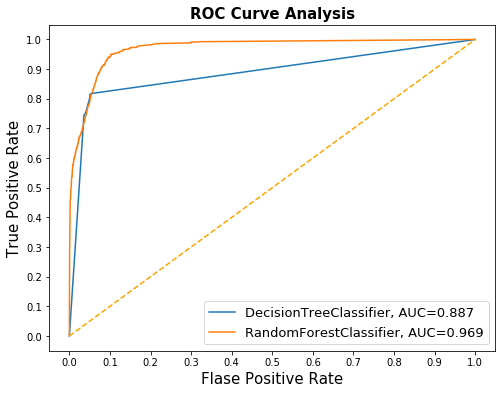

In [143]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [215]:
threshold = 0.4

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)

In [216]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      8465   577
1                       219  1245
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9042
           1       0.71      0.81      0.76      1464

    accuracy                           0.93     10506
   macro avg       0.84      0.88      0.86     10506
weighted avg       0.93      0.93      0.93     10506


Accuracy: 0.9286122215876642


In [217]:
threshold = 0.3

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)


In [218]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      8381   661
1                       171  1293
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9042
           1       0.71      0.81      0.76      1464

    accuracy                           0.93     10506
   macro avg       0.84      0.88      0.86     10506
weighted avg       0.93      0.93      0.93     10506


Accuracy: 0.9286122215876642


In [219]:
#SVM

In [220]:
import sys
!{sys.executable} -m pip install cvxopt

In [221]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

/Users/arvindpawar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [222]:
# #Creating the dependent variable class
# factor = pd.factorize(tpHighDf['classification'])
# tpHighDf.classification = factor[0]
# definitions = factor[1]
# print(tpHighDf.classification.head())
# print(definitions)

# X = tpHighDf.iloc[:, np.r_[2:80]].values
# Y = tpHighDf.iloc[:,1].values

In [223]:
#Creating the dependent variable class
factor = pd.factorize(tpHighNewDf['classification'])
tpHighNewDf.classification = factor[0]
definitions = factor[1]
print(tpHighNewDf.classification.head())
print(definitions)

X = tpHighNewDf.iloc[:, np.r_[2:80]].values
Y = tpHighNewDf.iloc[:,1].values

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

In [225]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [226]:
svc = LinearSVC()


In [ ]:
# print("Performance measures of SVM for Notable Risk", sep=('\n'))
# print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))
# print("")
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# accuracy = metrics.accuracy_score(y_test, predicted)
# accuracy

In [144]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
newdataframe=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]].copy()

In [147]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=newdataframe.columns).sort_values(ascending=False)
feature_imp

score                                        1.552357e-01
risk_factor                                  1.408603e-01
owner_name_Senior_Analyst_1                  1.045323e-01
owner_name_Senior_Analyst_2                  8.075336e-02
tenure                                       7.814932e-02
                                                 ...     
indicators_App_9_Heat_RDP_IND                3.226162e-07
indicators_App_3_Heat_Email_HRO              2.519562e-07
job_function_JOB_FUNCTION_2                  1.629955e-07
indicators_App_1_Heat_CD_Burn_PRE_2016_Q3    9.182314e-08
job_function_JOB_FUNCTION_4                  7.327550e-08
Length: 142, dtype: float64

In [148]:
feature_imp=feature_imp.nlargest(20)

No handles with labels found to put in legend.


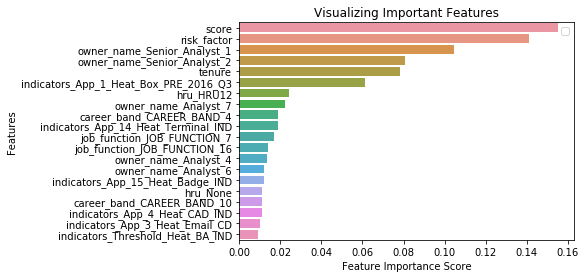

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [150]:
#Gradient Boosting

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [151]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,19616361638,1.74,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,19616361638,1.71,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,19616361638,3.21,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,19616361638,3.12,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,19616361638,3.00,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [152]:
tpHighNewDf['classification'].value_counts()

0    32357
1     5162
Name: classification, dtype: int64

In [153]:
#Creating the dependent variable class
factor = pd.factorize(tpHighDf['classification'])
tpHighDf.classification = factor[0]
definitions = factor[1]
print(tpHighDf.classification.head())
print(definitions)

X=tpHighDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighDf.iloc[:, 3]

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [154]:
# #Creating the dependent variable class
# factor = pd.factorize(tpHighNewDf['classification'])
# tpHighNewDf.classification = factor[0]
# definitions = factor[1]
# print(tpHighNewDf.classification.head())
# print(definitions)

# X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]]
# Y=tpHighNewDf.iloc[:, 3]


In [155]:
print(X.shape)

print(Y.shape)

(37519, 142)
(37519,)


In [156]:
import sys
!{sys.executable} -m pip install imblearn

In [157]:
from imblearn.over_sampling import (RandomOverSampler)

In [158]:
import scipy

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.28)

In [164]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [165]:
model=GradientBoostingClassifier()

In [166]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
16377    0
16377    0
16378    0
16378    0
16378    0
Name: classification, Length: 37519, dtype: int64

In [167]:
model.fit(X_rs, y_rs)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [168]:
y_pred=model.predict(X_test)

In [169]:
print(confusion_matrix(y_test, y_pred))

[[8753  718]
 [  14 1021]]


In [170]:
print("Gradient Boosting for Notable Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], 
                  colnames=['Predicted Observation']))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Gradient Boosting for Notable Risk
Predicted Observation     0     1
Actual Observation               
0                      8753   718
1                        14  1021
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      9471
           1       0.59      0.99      0.74      1035

    accuracy                           0.93     10506
   macro avg       0.79      0.96      0.85     10506
weighted avg       0.96      0.93      0.94     10506


Accuracy: 0.9303255282695603


In [171]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9553315307291977

In [172]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9303255282695603


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      9471
           1       0.59      0.99      0.74      1035

    accuracy                           0.93     10506
   macro avg       0.79      0.96      0.85     10506
weighted avg       0.96      0.93      0.94     10506



In [174]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

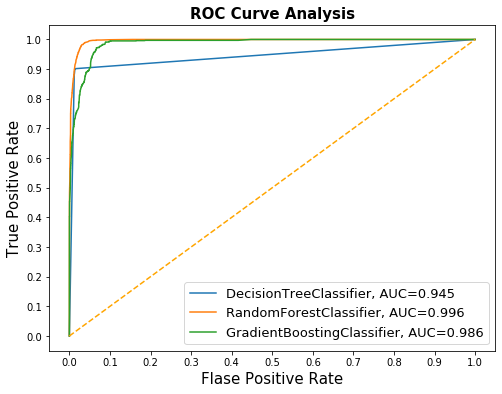

In [175]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

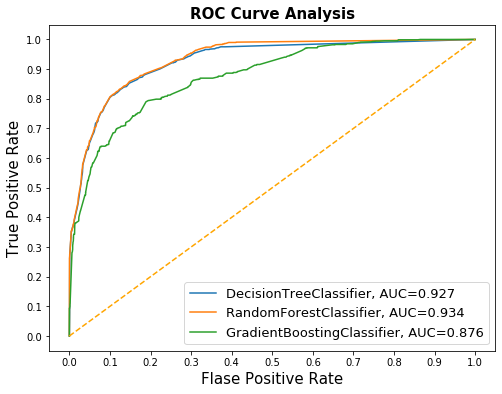

In [2083]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()